In [6]:
import sys
sys.path.append('..')

import skia

from back.neighbors_searcher import NeighborsSearcher
from back.cell_state_calculator import CellStateCalculator

from front.cell_caracteristics import CELL_SIZE
from front.window_manager import glfw_window, skia_surface

from front.table_starter import TableStarter
from back.table_builder import TableBuilder
from front.game_launcher import GameLauncher

from front.window_manager import glfw_window, skia_surface

In [7]:
n_row, n_col, height, width = TableStarter().start_table()

Number of rows: 10
10 rows
Number of columns: 10
10 columns
Table surface: height = 160 ; width = 160


In [8]:
height

160

In [9]:
width

160

In [10]:
n_iter = GameLauncher.n_iter_choice()

Number of iterations: 10
10 iterations


In [11]:
initial_state = TableBuilder().build_table(n_row=n_row, n_col=n_col)

In [12]:
initial_state

[[0, 0, 0, 1, 1, 1, 0, 1, 1, 1],
 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
 [1, 0, 1, 0, 1, 1, 1, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
 [1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
 [1, 1, 1, 0, 1, 0, 1, 0, 0, 1],
 [1, 1, 1, 1, 0, 0, 0, 1, 1, 0],
 [0, 1, 0, 1, 1, 1, 1, 0, 1, 0]]

In [13]:
next_table = GameLauncher.compute_next_state_table(n_row=n_row, n_col=n_col, actual_state=initial_state)

In [14]:
next_table

[[0, 0, 1, 1, 1, 0, 0, 0, 1, 0],
 [1, 1, 1, 1, 0, 1, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 0, 0, 0, 1, 1, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [1, 0, 1, 0, 0, 0, 0, 1, 1, 0],
 [0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
 [1, 1, 0, 1, 1, 1, 1, 0, 1, 0]]

In [15]:
surface = skia.Surface(height, width)

def draw_table_2(surface, table: list, n_row: int, n_col: int):
        with surface as canvas:
            for i in range(n_row):
                for j in range(n_col):
                    if table[i][j] == 1:
                        rect, paint = GameLauncher.draw_one_cell(row=i, col=j, color='white')
                    else:
                        rect, paint = GameLauncher.draw_one_cell(row=i, col=j, color='black')
                    canvas.drawRect(rect, paint)
                    
        image = surface.makeImageSnapshot()
        return image

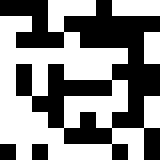

In [16]:
draw_table_2(surface=surface, table=initial_state, n_row=n_row, n_col=n_col)

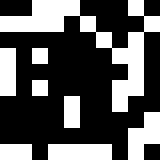

In [17]:
draw_table_2(surface=surface, table=next_table, n_row=n_row, n_col=n_col)

In [20]:
import time
import contextlib, glfw, skia
from OpenGL import GL

with glfw_window(height, width) as window:
    GL.glClear(GL.GL_COLOR_BUFFER_BIT)

    with skia_surface(window) as surface:
        with surface as canvas:
            for i in range(n_row):
                for j in range(n_col):
                    if initial_state[i][j] == 1:
                        rect, paint = GameLauncher.draw_one_cell(row=i, col=j, color='white')
                    else:
                        rect, paint = GameLauncher.draw_one_cell(row=i, col=j, color='black')
                    canvas.drawRect(rect, paint)
        surface.flushAndSubmit()
        glfw.swap_buffers(window)
        
        time.sleep(5)
        
        with surface as canvas:
            for i in range(n_row):
                for j in range(n_col):
                    if next_table[i][j] == 1:
                        rect, paint = GameLauncher.draw_one_cell(row=i, col=j, color='white')
                    else:
                        rect, paint = GameLauncher.draw_one_cell(row=i, col=j, color='black')
                    canvas.drawRect(rect, paint)
        surface.flushAndSubmit()
        glfw.swap_buffers(window)
        
        time.sleep(5)
        
        while (glfw.get_key(window, glfw.KEY_ESCAPE) != glfw.PRESS
            and not glfw.window_should_close(window)):
            glfw.wait_events()